In [1]:
from datasets import load_from_disk

from utils import *

In [2]:
rng = PRNG(0)

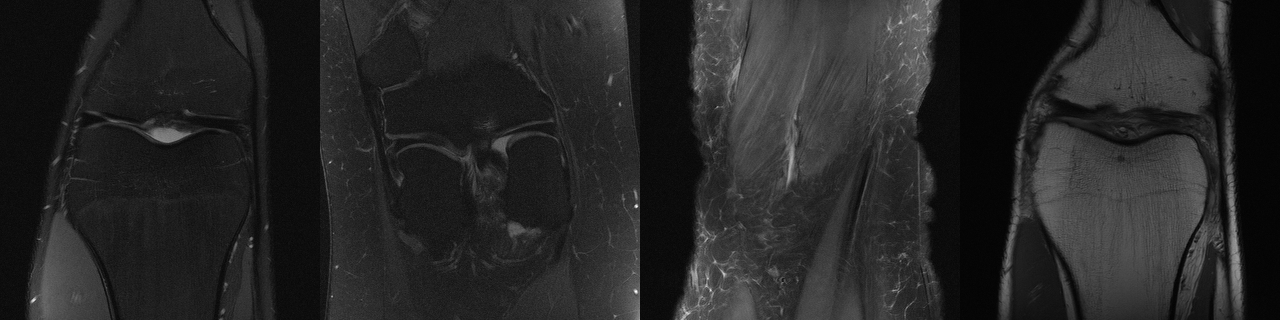

In [3]:
dataset = load_from_disk(PATH / 'hf/fastmri')
dataset.set_format('numpy')

x_eval = dataset['val'][256:1280:256]['x']
to_pil(x_eval)

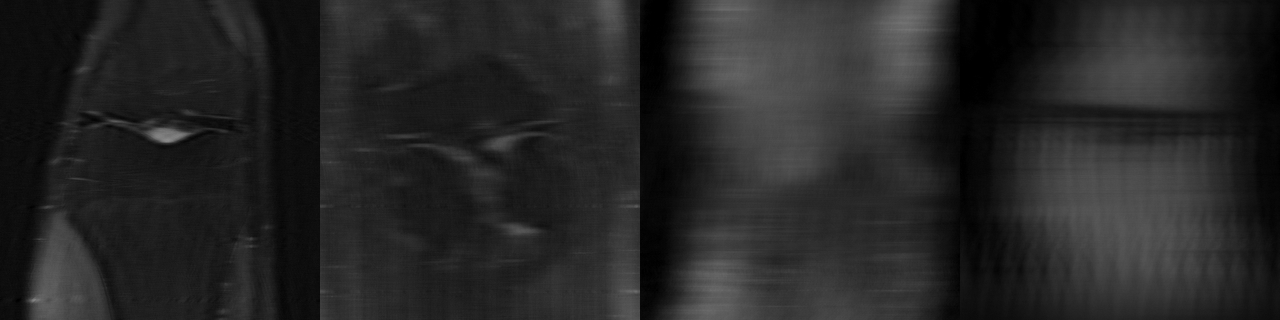

In [4]:
A_eval = jnp.stack([make_mask(r=r) for r in (4, 8, 16, 32)])
y_eval = unflatten(measure(A_eval, flatten(x_eval)), 320, 320)
y_eval = y_eval + 1e-2 * rng.normal(y_eval.shape)

x_zero = ifft2c(real2complex(y_eval)).real
to_pil(x_zero)

In [5]:
run = 'azure-moon-69_qmrgxzli'
lap = 15

model = load_module(PATH / f'runs/{run}/checkpoint_{lap}.pkl')

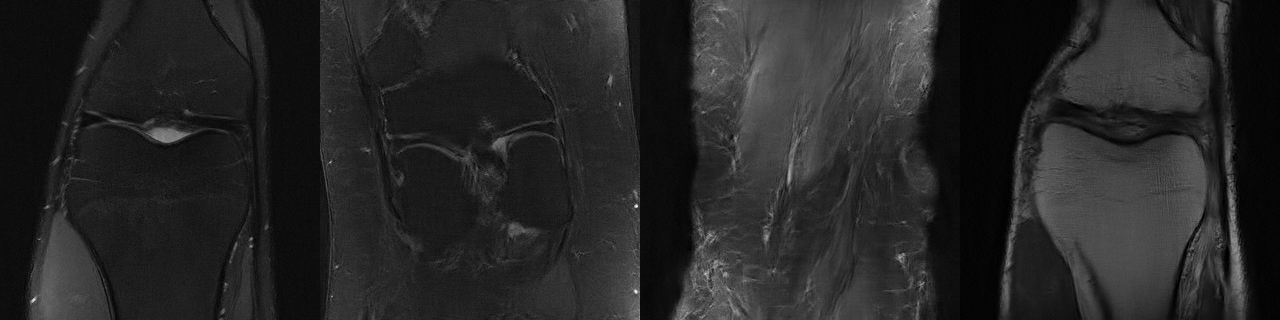

In [6]:
x_infer_1 = sample(model, y_eval, A_eval, rng.split(), steps=64, maxiter=5)
to_pil(x_infer_1)

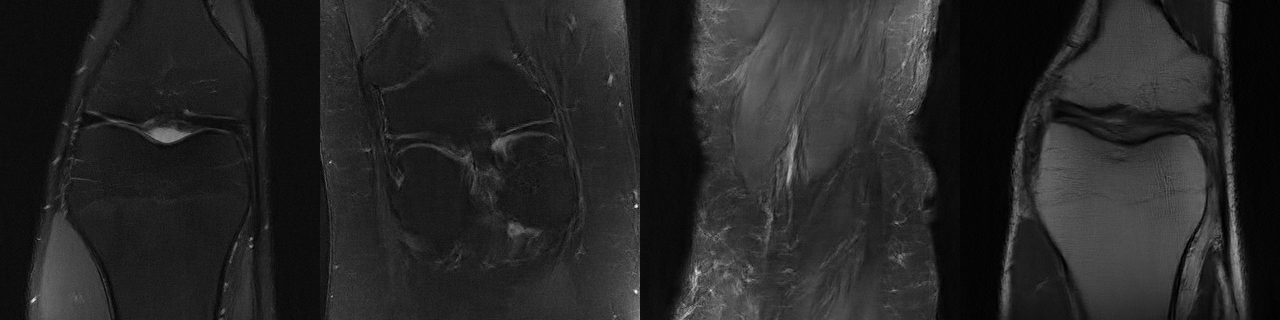

In [7]:
x_infer_2 = sample(model, y_eval, A_eval, rng.split(), steps=64, maxiter=5)
to_pil(x_infer_2)

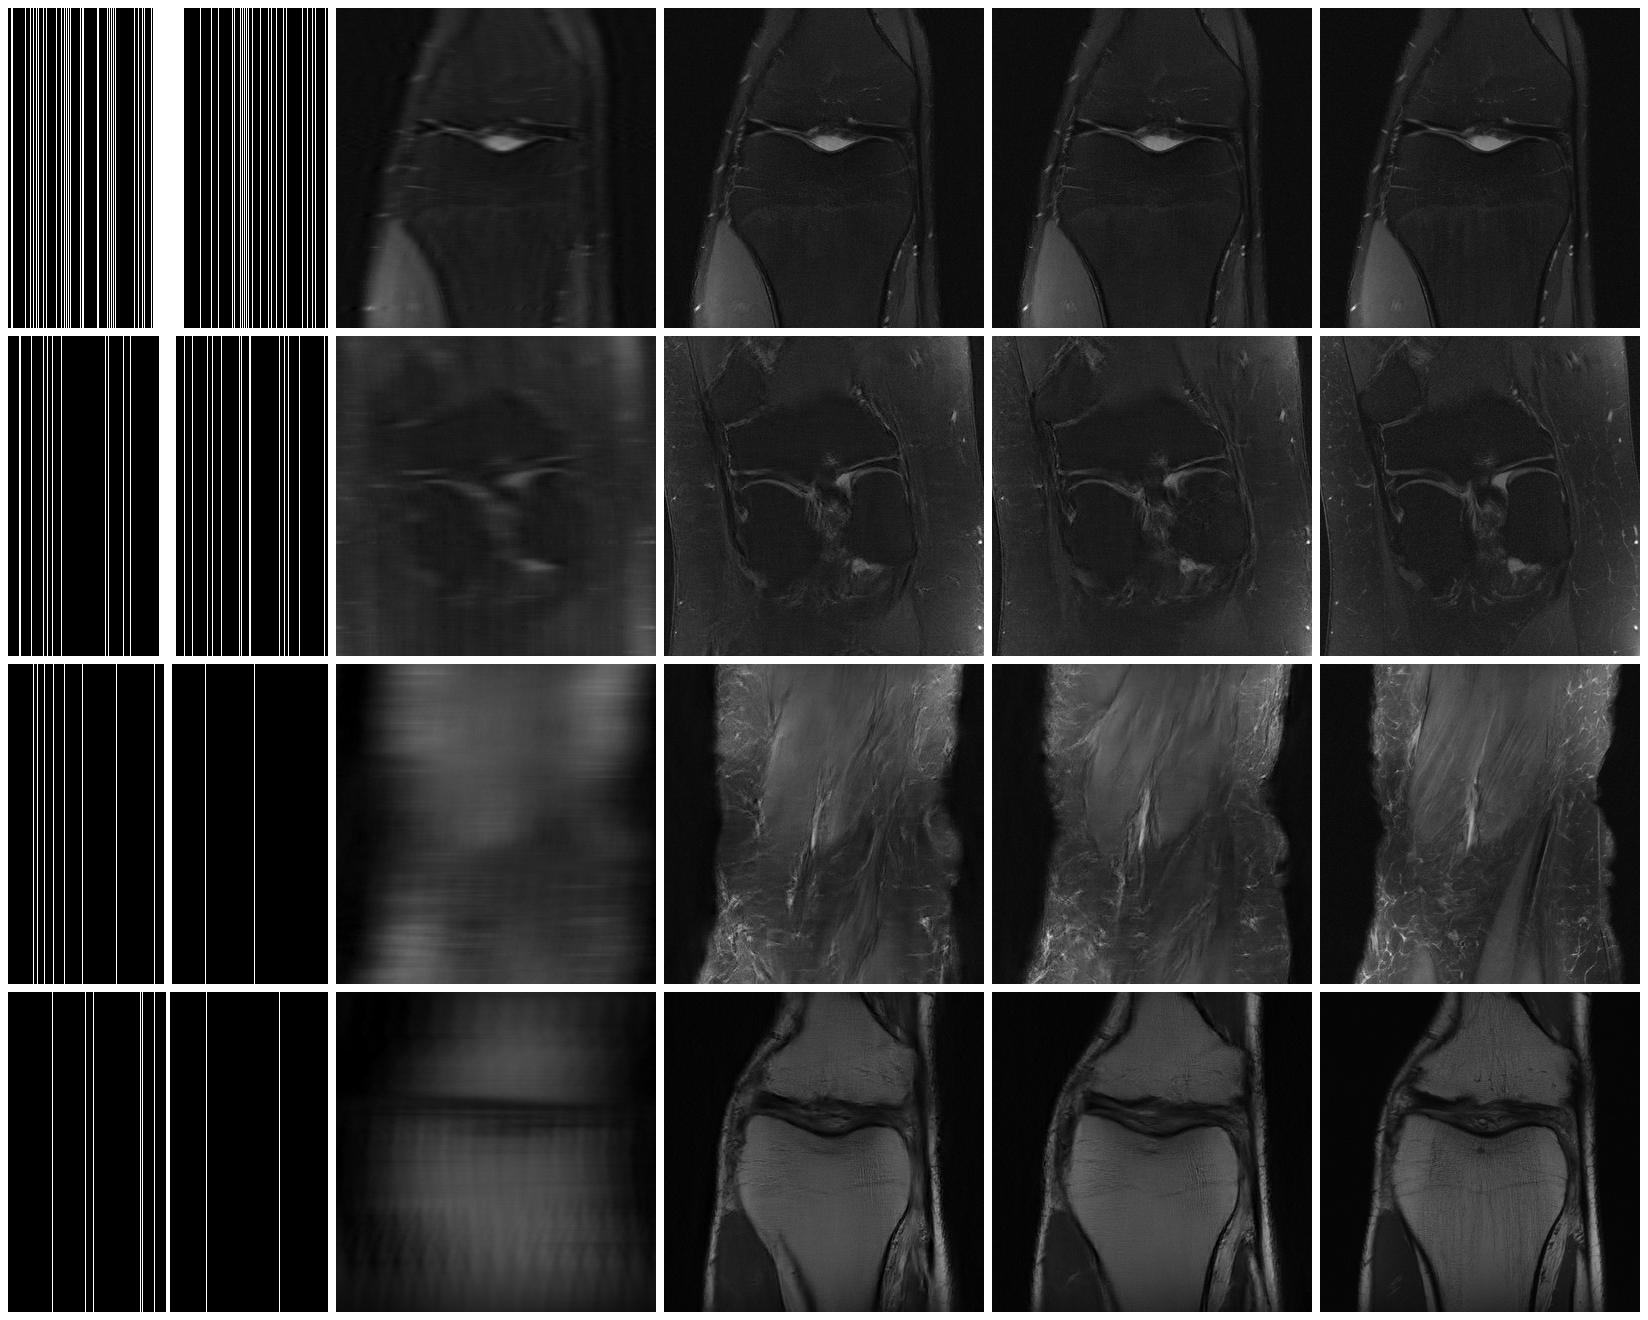

In [8]:
images = [
    list(map(to_pil, jnp.broadcast_to(A_eval * 4 - 2, x_eval.shape))),
    list(map(to_pil, x_zero)),
    list(map(to_pil, x_infer_1)),
    list(map(to_pil, x_infer_2)),
    list(map(to_pil, x_eval)),
]

images = list(zip(*images))

collate(images, pad=8).save('fastmri_grid.png')
collate(images, pad=8)